# Dynamic Profile Scrape 
In this example, we will subclass and extend instascrape.Profile to dynamically scrape all the posts of a profile using Selenium. Additionally, all posts will be loaded as instascrape.Post objects which will give us the ability to scrape individual posts for all of their data as well.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 

from dynamic_profile import DynamicProfile

### Scraping the data 
First, we'll start by scraping the data with our DynamicProfile subclass of instascrape.Profile. To get an understanding of how this class works, go take a look at it's source in dynamic_profile.py included in this folder. For the purpose of this exercise, it will make requests synchronously but if you wanted to speed it up, you could rewrite this asynchrounously.

In [2]:
username = 'realpython'
profile = DynamicProfile.from_username(username)
profile.static_load()
profile.dynamic_load()

0
10
20
30
40
50
60
70
80
90
'entry_data'
100
110
120
130
140
150
160
'entry_data'
170
180
'entry_data'
190
200
210
220
230
240


### Plotting the data 
Now that the data has been scraped, we can get into analyzing it! Let's clean it up a little, create a DataFrame, and get going with plotting this data. 

First, let's build a list of tuples where each tuple represents a posts upload date and the amount of likes a post got. 

In [57]:
data_arr = []
for post in profile.posts:
    try:
        data_arr.append((post.data.upload_date, post.data.likes, post.data.amount_of_comments))
    except AttributeError: 
        pass 

With that list of tuples now, we can instantiate a pandas.DataFrame to make working with our data more manageable. 

In [60]:
dataframe = pd.DataFrame(data_arr, columns=['datetime', 'likes', 'comments'])                          
dataframe = dataframe.sort_values(by=['datetime']).reset_index(drop=True)   #Sort by date
dataframe.fo                                                      #Show last 10 data points

AttributeError: 'DataFrame' object has no attribute 'foot'

Now that we have our DataFrame, we can begin exploring this profile's data. Let's get a simple scatter plot so we can see if there are any trends we can see right off the bat. 

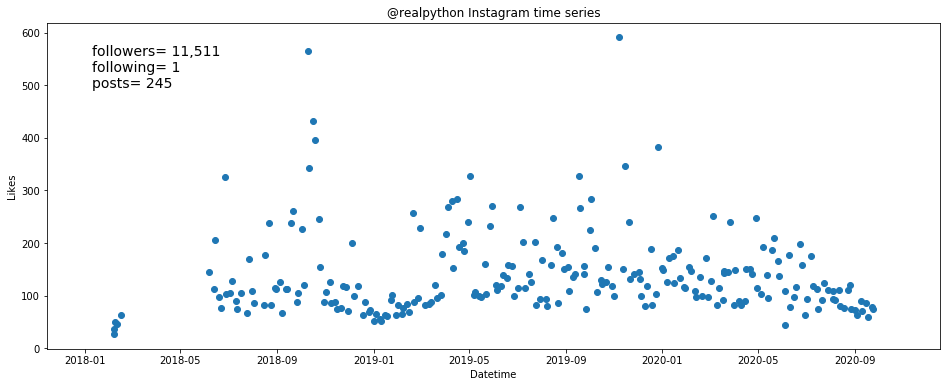

In [39]:
from pandas.plotting import register_matplotlib_converters

#Draw the scatter plot
plt.scatter(dataframe['datetime'], dataframe['likes'])
fig = plt.gcf()
ax = plt.gca()
fig.set_size_inches(16, 6)

#Write text where applicable 
description = f"followers={profile.data.followers: ,}\n"
description += f"following={profile.data.following: ,}\n"
description += f"posts={profile.data.posts: ,}"
plt.text(0.05, 0.8, description, transform=ax.transAxes, fontsize=14)

#Write labels 
plt.xlabel('Datetime')
plt.ylabel('Likes')
plt.title(f'@{username} Instagram time series')
# plt.legend(loc="upper left")
plt.show()